### Human lens chromatic aberration

The human lens has a very strong wavelength-dependent blur.  This is called chromatic aberration. We plot the estimated blurring of a thin line using the two types of human lens calculations in ISETBIO.  

First, we use the Marimont and Wandell model which is derived theoretically with some assumptions. 

Then we use the wavefront model, which is calculated from empirical measurements.


In [142]:
ieInit

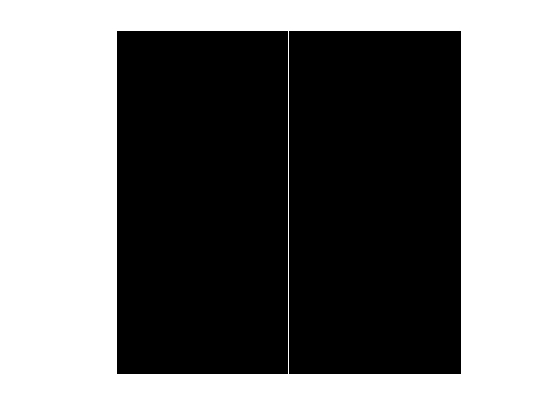

In [143]:
sceneD65 = sceneCreate('line d65',384);  % A lot of samples for smooth curves
sceneD65 = sceneSet(sceneD65,'fov',1);   % Small field of view so we can see the blurring
% scene = sceneSet(sceneD65,'wave',450);
scene = sceneD65;
sceneShowImage(scene);

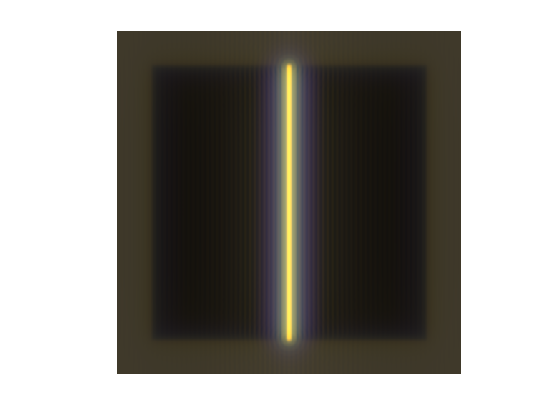

In [144]:
% This is the Marimont and Wandell human image formation model
oi = oiCreate('mw human');
oi = oiCompute(scene,oi);

% Notice how the image irradiance is blurred and there are apparent color changes.
% These changes arise because of the wavelength-dependent blurring.
oiShowImage(oi);

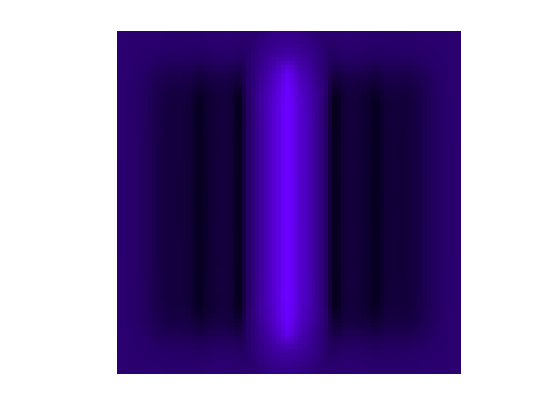

10 nm band assumed


In [161]:
% We can check wavelength by wavelength, this way.
% We set the scene to a short wavelength.  The blurring is very large!
scene = sceneCreate('line d65');
scene = sceneSet(scene,'fov',1);
sceneD65 = scene;

scene = sceneSet(scene,'wavelength',430);

oi = oiCreate('human');
oi = oiCompute(oi,scene);
vcNewGraphWin; oiShowImage(oi);

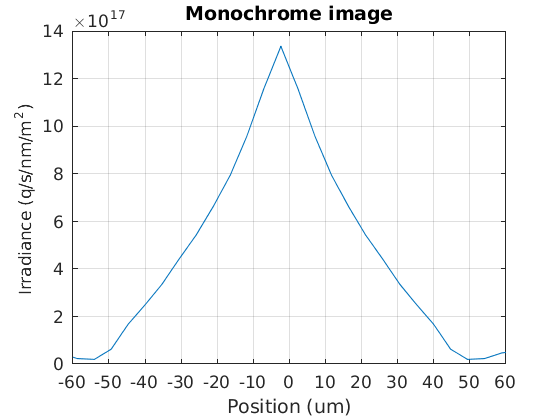

sz =

    80    80


In [162]:
% Notice how spread out the blue line is on the retinal surface.  
% 1 deg of visual angle is about 330 um, and the full-width half maximum of
% the blue line is about 40 um, or 1/10th of a degree.
sz = oiGet(oi,'size')
oiPlot(oi,'irradiance hline',[sz]/2);
set(gca,'xlim',[-500 500]);
xlabel('Position (um)'); set(gca,'fontsize',8,'xlim',[-60 60],'xtick',[-80:10:80]);

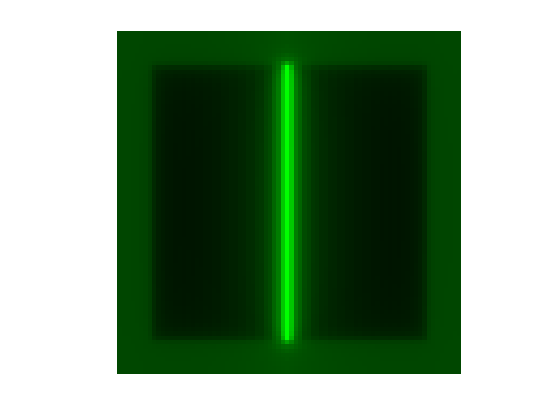

10 nm band assumed


In [155]:
scene = sceneD65;
scene = sceneSet(scene,'wavelength',550);

oi = oiCreate('human');
oi = oiCompute(oi,scene);
vcNewGraphWin; oiShowImage(oi);

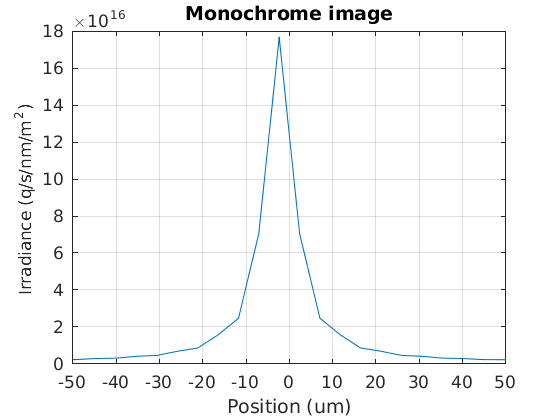

sz =

    80    80


In [158]:
% The green line full-width half max (FWHM) is about 8-10 um, less than 1/30th of a degree.
sz = oiGet(oi,'size')
oiPlot(oi,'irradiance hline',[sz]/2);
set(gca,'xlim',[-500 500]);
xlabel('Position (um)'); set(gca,'fontsize',8,'xlim',[-50 50],'xtick',[-50:10:50]);

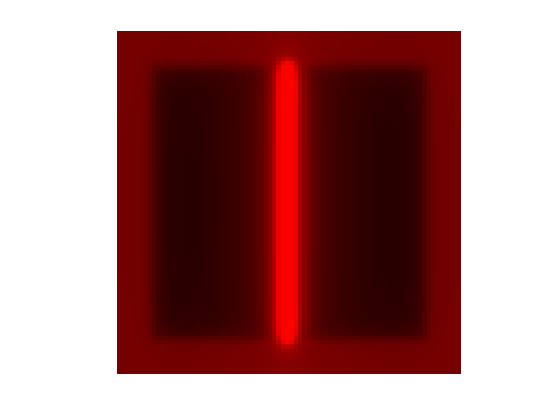

10 nm band assumed


In [164]:
% The long-wavelength line spread is wider than the middle-wavelength
% But it is not as wide as the short wavelength case.
scene = sceneD65;
scene = sceneSet(scene,'wavelength',680);

oi = oiCreate('human');
oi = oiCompute(oi,scene);
vcNewGraphWin; oiShowImage(oi);

### Try using oiPlot 

Create the line d65 again, and try plotting some of the features of the oi using oiPlot.
Here is the help command.

Gateway routine for plotting optical image (oi) properties
 
    [udata, g] = oiPlot([oi],[pType='illuminance hline'],[xy],[wave])
 
  Gateway routine to plot the irradiance or illuminance data in the
  optical image. There are many options.
 
  The data shown in the plot are generally returned in udata.  The data can
  also be retrieved from the figure, using get(figHandle,'userdata');
 
  Inputs are the optical image (oi), the plot type (pType), in some cases a
  position or ROI locations is required (xy) and in some cases other
  arguments can be included to make plotting from scripts possible without
  user intervention (e.g., grid spacing in irradiance image with grid).
 
  This is a list of the plot types
 
     Irradiance
      {'irradiance photons roi'} - Irradiance within an ROI of the image
      {'irradiance energy roi'}  - Irradiance within an ROI of the image
      {'irradiance vline'}  - Horizontal line spectral irradiance (photons) 
                             (space x wavelength)
      {'irradiance hline'}  - Vertical line spectral irradiance (photons) 
                             (space x wavelength)
      {'irradiance fft'}    - 2D FFT of radiance at some wavelength
      {'irradiance image grid'} - Show spatial grid on irradiance image
      {'irradiance image no grid'} - Show irradiance image without a grid
      {'irradiance waveband image'} - Irradiance image within a band
 
     Illuminance
      {'illuminance mesh log'}      - Mesh plot of image log illuminance
      {'illuminance mesh linear'}   - Mesh plot of image illuminance
      {'illuminance fft'}       - 2D FFT of illuminance
      {'illuminance hline'}     - Horizontal line illuminance
      {'illuminance fft hline'} - Horizontal line illuminance fft
      {'illuminance vline'}     - Vertical line luminance
      {'illuminance fft vline'} - Vertical line luminance FFT
      {'illuminance roi'}       - Histogram of illuminance in an ROI
 
     CIE
       {'chromaticity roi'}     - CIE xy in a region of interest
 
     Contrast
      {'contrast hline'}       - Horizontal line contrast at a wavelength
      {'contrast vline'}       - Vertical line contrast
 
     Depth
      {'depth map'}            - If it has a depth map, plot it as a mesh
      {'depth map contour'}    - If it has a depth map, plot it as a mesh
 
     Optics related:
       {'otf'}            - Optical transfer function, units are lines/mm
       {'otf 550'}        - OTF at 550 nm
       {'otf wavelength'} - One dimensional cut through the OTF at all
                            wavelengths. Units are cycles/mm
       {'psf'}            - Point spread function at selected wavelength
       {'psf 550'}        - PSF at 550nm spatial units are microns
       {'ls wavelength'}  - Line spread function at all wavelengths.
          Peak spatial frequency can be set for the OTF (default:
          3*incoherent cutoff). Number of spatial samples to plot in the
          line spread can be set (default: 40).
 
        {'lens transmittance'} - Spectral lens transmittance.  
              Computed from the lens density in the human case.
 
  See also:  s_oiPlot, and scenePlot
 
  Examples:
    oi = vcGetObject('oi');
    rows = round(oiGet(oi,'rows')/2);
 
    uData = oiPlot(oi,'irradiance hline',[1,rows])
    uData = oiPlot(oi,'illuminance fft hline',[1,rows])
 
    uData = oiPlot(oi,'contrast hline',[1,rows])
 
    uData = oiPlot(oi,'irradiance image grid')
    uData = oiPlot(oi,'irradiance image grid',[],40)
    uData = oiPlot(oi,'irradiance image wave',[],500,40);
 
    uData = oiPlot(oi,'irradiance energy roi');
 
    uData = oiPlot(oi,'psf 550','um')
    uData = oiPlot(oi,'otf 550','um')
    uData = oiPlot(oi,'ls wavelength')
 
  Copyright ImagEval Consultants, LLC, 2005.